### ASTROINFORMATICS, Fall 2018
https://github.com/astromundus/astroinfo2018/blob/master/lectures-notebooks/Week-2-2.ipynb


# Week 2 Introduction to Probability & Statistics. II 

## Central Limit Theorem

In [1]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

### Uncertainty for the mean and the sample standard deviation

We introduced the uncertainty of our estimates of $\overline{x}$ and $s$: 

$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$

which we call the *standard error of the mean*, and the uncertainty of $s$:

$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$

Note that for large $N$, $\sigma_{\overline{x}} \sim \sqrt{2}\sigma_s$ and for small $N$, $\sigma_s$ is not much smaller than $s$.

### Standard Error vs. Standard Deviation

Note the difference between the ***standard deviation*** and and the ***standard error***. The former describes the property of the distribution we're attempting to estimate (i.e., how far is a typical individual sample away from the sample mean); the latter describes the precision of our estimate of some quantity (e.g., the mean itself).

Example:
* An average human is 1.65m (female) and 1.78 (male) tall. With enough measurements, the error of that estimate of the mean can get almost arbitrarily small.
* Human height is approximately normally distributed, with a standard deviation of $9-10$ cm. No matter how many measurements we perform, the that standard deviation will not reduce -- it's the property of the population (and sample).

Fun fact: *"The people of the Dinaric Alps mainly South Slavs (Montenegro and East Herzegovina [and Croatia]) are on record as being the tallest in the world, with a male average height of 185.6 cm (6 ft 1.1 in) and female average height of 170.9 cm (5 ft 7.3 in)."* -- Wikipedia

### Visualizing the standard error

Let's see how it looks in practice by doing a few numerical experiments: we'll:

* draw $k=10$ numbers from $N(\mu=1.0, \sigma=0.1)$ and compute their mean
* repeat this computation M=10,000 times and plot the distribution of these M means

Will this distribution well described by $N(1.0, \frac{0.1}{\sqrt{k}})$?

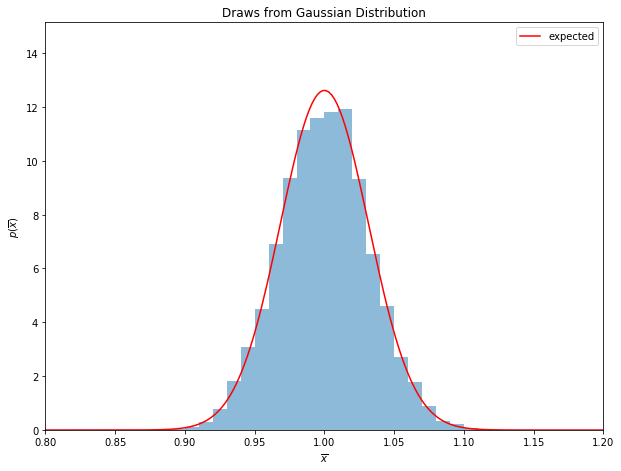

In [2]:
np.random.seed(42)
k = 10
M = 10000
mu = 1.0
sigma = 0.1
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = norm(mu, sigma).rvs(k) # here we draw k numbers from N(mu=1.0, sigma=0.1)
    means[i] = np.mean(x)
## now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(10, 7.5))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 41),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
xGrid = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(xGrid)  # this is a function of x: gauss(x)
plt.plot(xGrid, gauss, ls='-', c='red', label='expected')

plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Draws from Gaussian Distribution')
plt.legend()
plt.show()

What if we don't draw from a gaussian distribution, but instead from a uniform distribution?

Let's first see one (largish) sample drawn from uniform distribution.

st.dev.= 0.10026144448


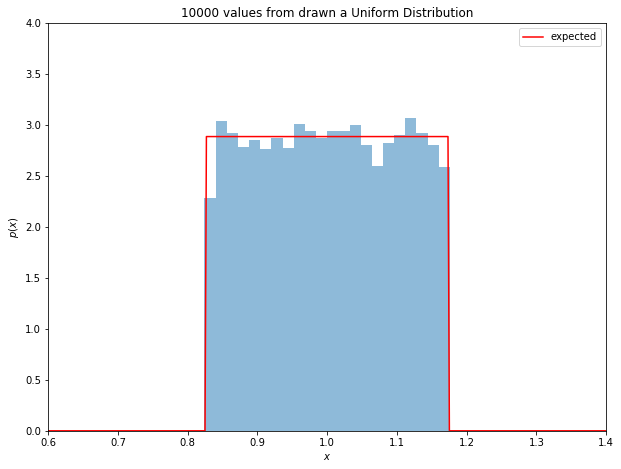

In [3]:
k = 10
M = 10000
mu = 1.0
sigma = 0.1
W = sigma*np.sqrt(12.0)  # same standard deviation as for gaussian
left = mu - 0.5 * W    
x = uniform(left, W).rvs(10000) # here we draw 10000 numbers between 0.8268 and 1.1732
print('st.dev.=',np.std(x))
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(10, 7.5))
# histogram the data
ax.hist(x, bins=np.linspace(0.6, 1.4, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected uniform distribution
xGrid = np.linspace(0, 2, 1000)
flat = uniform(left,W).pdf(xGrid)  # this is a function of x: gauss(x)
plt.plot(xGrid, flat, ls='-', c='red', label='expected')
plt.xlim(0.6, 1.4)
plt.ylim(0, 4)
plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('10000 values from drawn a Uniform Distribution')
plt.legend()
plt.show()

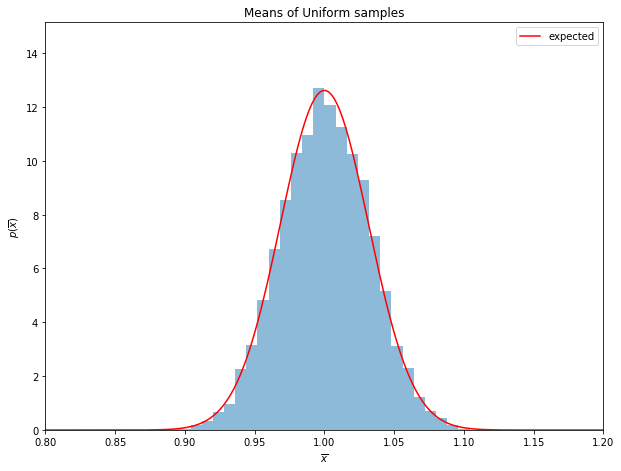

In [4]:
### what if we don't draw from a gaussian distribution, but instead from a uniform distribution?
# 2) draw k=10 numbers from a uniform distribution U(mu=1.0, W) and compute their mean; repeat this 
#    computation M=1000 times and plot the distribution of these M means; is this
#    distribution well described by N(1.0, 0.1/sqrt(k))? 
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = uniform(left, W).rvs(k) # here we draw k numbers between 0.8268 and 1.1732  
    means[i] = np.mean(x)
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(10, 7.5))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
x = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(x)  # this is a function of x: gauss(x)
plt.plot(x, gauss, ls='-', c='red', label='expected')
plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Means of Uniform samples')
plt.legend()
plt.show()

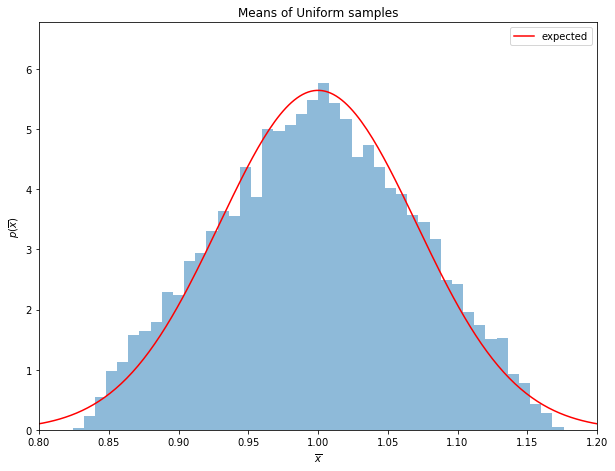

In [5]:
### this is becoming interesting: it looks like it doesn't matter from which 
### distribution we draw our sample! Does it depend on the sample size? 
# 3) draw now k=2 numbers from U(mu=1.0, W=2.0) 
k = 2
means = np.zeros(M)  # for storing the mean values obtained in M draws
for i in range(M):
    x = uniform(left, W).rvs(k) # here we draw k numbers between 0.8268 and 1.1732  
    means[i] = np.mean(x)
# now plot the histogram of values in array means
fig, ax = plt.subplots(figsize=(10, 7.5))
# histogram the data
ax.hist(means, bins=np.linspace(0.8, 1.2, 51),
            histtype='stepfilled', alpha=0.5, normed=True)
# expected gaussian distribution
x = np.linspace(0, 2, 1000)
gauss = norm(mu, sigma/np.sqrt(k)).pdf(x)  # this is a function of x: gauss(x)
plt.plot(x, gauss, ls='-', c='red', label='expected')
plt.xlim(0.8, 1.2)
yMax = 1.2*np.sqrt(k)/np.sqrt(2*3.14) / sigma 
plt.ylim(0, yMax)
plt.xlabel('$\overline{x}$')
plt.ylabel(r'$p(\overline{x})$')
plt.title('Means of Uniform samples')
plt.legend()
plt.show()

Now it is not such a good agreement any more!!

The blue histogram seems limited to the range from 0.83 to 1.17, why? 

![SlideGrab](figures/p6.jpg) 

A nice (online) proof of the CLT: http://www.cs.toronto.edu/~yuvalf/CLT.pdf

![SlideGrab](figures/p7.jpg) 

## Robust Statistics

![SlideGrab](figures/p22.jpg) 

While it is perhaps most common to compute the mean, the median is a more *robust* estimator of the (true) mean location of the distribution.  That's because it is less affected by outliers.

In [6]:
# Execute this cell.  Think about what it is doing.
data = norm(0.5, 0.1).rvs(10000)
mean = np.mean(data)
median = np.median(data)
stdev = np.std(data)
mask = data>0.7
print('the number of modified points:', np.sum(mask))
data[mask] = data[mask]*10
newmean = np.mean(data)
newmedian = np.median(data)
newstdev = np.std(data)
print('mean:', mean, newmean)
print('median:', median, newmedian)
print('st.dev.:', stdev, newstdev)

the number of modified points: 220
mean: 0.498583695707 0.644702573142
median: 0.499883249826 0.499883249826
st.dev.: 0.100467123235 1.01580286259


### Percentiles and quartiles

Percentiles, $q_p$, are computed as
$$\frac{p}{100} = \int_{-\infty}^{q_p}h(x) dx$$

For example, the 25th, 50th, and 75th percentiles:

In [7]:
# execute:
mu=100
sigma=15
sampleSize=1000000
data = norm(mu, sigma).rvs(sampleSize) 
# %timeit data = norm(mu, sigma).rvs(sampleSize) 
q25 = np.percentile(data, 25)
q50 = np.percentile(data, 50)
# %timeit q50 = np.percentile(data, 50)
q75 = np.percentile(data, 75)
print(q25, q50, q75)

89.840400814 99.9910326359 110.110606209


In [8]:
# execute:
%timeit mean = np.mean(data)
%timeit median = np.median(data)

mean = np.mean(data)
median = np.median(data)
print (mean, median)

491 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.1 ms ± 501 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
99.9805286797 99.9910326359


The difference between the 25th and 75th percentiles, $q_{75} - q_{25}$, is called the *interquartile range*.

The median and interquartile range are more _robust_ estimators of the location and scale parameters 
than the mean and standard deviation.  So, one can create a robust standard deviation like estimator,
from the interquartile range as

$$\sigma_G = 0.7413(q_{75} - q_{25}).$$

The normalization (0.7413) makes it *unbiased* estimator of standard deviation in case of a Gaussian.

![SlideGrab](figures/p24.jpg)  

In [9]:
# execute
%timeit sigmaG = astroMLstats.sigmaG(data)
%timeit stdev = np.std(data)

14 ms ± 28.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.4 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
# execute
print(astroMLstats.sigmaG(data), np.std(data))

15.0263257437 15.0132216972


### Mode

The mode is the most probable value, determined from the peak of the distribution, which is the value where the derivative is 0:

$$ \left(\frac{dh(x)}{dx}\right)_{x_m} = 0$$

The mode can be estimated (at least for a Gaussian distribution) as

$$x_m = 3q_{50} - 2\mu$$

In [11]:
# Execute this cell
mode = 3*q50 - 2*mean
print(mode, mean, median)

100.012040548 99.9805286797 99.9910326359


## Some Important Distributions

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form or a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.


### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$, and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range).

Since we are used to thinking of a Gaussian as the *only* type of distribution the concept of $\sigma$ (aside from the width) may seem strange.  But $\sigma$ as mathematically defined above applies here and
$$\sigma = \frac{W}{\sqrt{12}}.$$


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2398  100  2398    0     0  51021      0 --:--:-- --:--:-- --:--:-- 51021


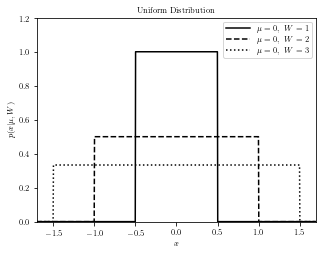

In [12]:
# Execute this cell
! curl -O http://www.astroml.org/_downloads/fig_uniform_distribution.py 
%matplotlib inline
%run fig_uniform_distribution.py

### Log Normal

Note that if $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$.  Try it.

### $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to

$$z_i = \frac{x_i-\mu}{\sigma},$$

then the sum of squares, $Q$ 

$$Q = \sum_{i=1}^N z_i^2,$$

will follow the *$\chi^2$ distribution with $k$ degrees of freedom* (see next slide for discussion of $k$).

The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines the $\chi^2$ distribution and is given by

$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$

where $Q>0$ and the $\Gamma$ function would just be the usual factorial function if we were dealing with integers, but here we have half integers.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2407  100  2407    0     0  51212      0 --:--:-- --:--:-- --:--:-- 51212


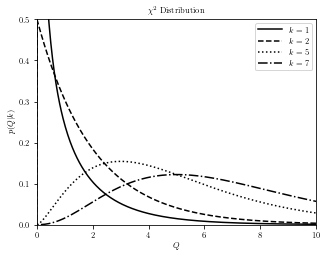

In [13]:
# Execute this cell
!curl -O http://www.astroml.org/_downloads/fig_chi2_distribution.py
%run fig_chi2_distribution.py

### Chi-squared per degree of freedom

For large $k$ (say, $k > 10$ or so), $\chi^2$-distribution becomes well approximated by the Normal distribution (Gaussian):

$$ p(\chi^2|k) \sim N(\chi^2 | k, \sqrt{2k}) $$

In practice we frequently divide $\chi^2$ by the number of degrees of freedom, and work with:

$$\chi^2_{dof} = \frac{1}{N-1} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

which is distributed as

$$ p(\chi^2_{dof}) \sim N\left(\chi^2_{dof} \rvert 1, \sqrt{\frac{2}{N-1}}\right) $$

(where $k = N-1$, and $N$ is the number of samples). Therefore, we expect $\chi^2_{dof}$ to be 1, to within a few $\sqrt{\frac{2}{N-1}}$.

![SlideGrab](figures/p19.jpg) 

![SlideGrab](figures/p20.jpg) 

![SlideGrab](figures/p25.jpg) 

## Multivariate distributions

## Bivariate and Multivariate Distribution Functions

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the (dimensionless) correlation coefficient.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.   These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Figure 3.22 from the textbook):
![Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution.  These are called the **principal axes** and are given by
$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$
and
$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this coordinate system are
$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that the correlation vanishes in this coordinate system and the bivariate Gaussian is just a product of two univariate Gaussians.  This concept will be crucial for understanding Principal Component Analysis when we get to Chapter 7, where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$.  Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Figure 3.23 from the textbook for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

For an example of how to generate a bivariate distribution and plot confidence contours, execute the following cell.

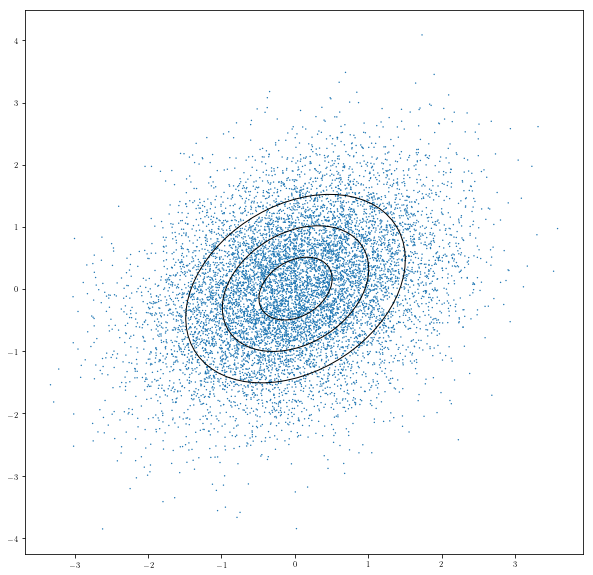

In [14]:
# Base code drawn from the textbook, Figure 3.22, edited by G. Richards to simplify the example
from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = [0, 0]
cov = [[1, 0.3], [0.3, 1]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# Fit those data with a bivariate normal distribution
mean, sigma_x, sigma_y, alpha = fit_bivariate_normal(x,y)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean, N * sigma_x, N * sigma_y, angle=alpha * 180./np.pi, lw=1, ec='k', fc='none'))

## Histograms

![SlideGrab](figures/p27.jpg) 

![SlideGrab](figures/p28.jpg) 

![SlideGrab](figures/p29.jpg) 

![SlideGrab](figures/p30.jpg) 

![SlideGrab](figures/p31.jpg) 

![SlideGrab](figures/p32.jpg) 

(array([  5.,   6.,  17.,  21.,  23.,  18.,   9.,   1.]),
 array([  63.27170082,   72.52224536,   81.77278989,   91.02333443,
         100.27387896,  109.5244235 ,  118.77496803,  128.02551257,
         137.2760571 ]),
 <a list of 1 Patch objects>)

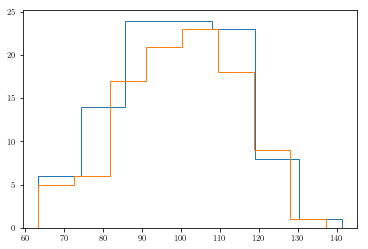

In [15]:
from astroML.plotting import hist as fancyhist
x = norm(100, 15).rvs(100)
fancyhist(x, bins="scott", histtype="step")
fancyhist(x, bins="freedman", histtype="step")

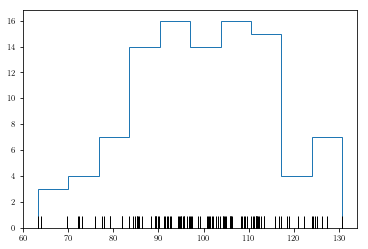

In [16]:
plt.hist(x,histtype="step")
plt.plot(x, 0*x, '|', color='k', markersize=25) # N.B. markersize is in *points*

We will learn more tricks later in class (Week 9), see

http://www.astroml.org/book_figures/chapter6/fig_GMM_density_estimation.html